In [117]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [118]:
pd.set_option('display.max_colwidth', -1)

# 1. Run

## Params for 1. Run

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words

pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {

    'logisticregression__C': [0.1, 0.5, 1, 3, 7, 10],
    'logisticregression__penalty': ['l2', 'l1'],
    'logisticregression__solver': ['liblinear', 'lbfgs']
    
}

logreg = [pipe_logreg, pipe_logreg_params]

pipe_svm = make_pipeline(TfidfVectorizer(), LinearSVC())
pipe_svm_params = {
    'linearsvc__C': [0.1, 0.5, 1, 3, 7, 10],
    'linearsvc__penalty': ['l2', 'l1']
    
}

svm = [pipe_svm, pipe_svm_params]

pipe_naivebayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb = [pipe_naivebayes, {}]

pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto", "sqrt", "log2"],
    'decisiontreeclassifier__max_depth': [None, 100, 125, 150, 175, 200],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10, 20], 
}

dectree = [pipe_dectree, pipe_dectree_params]


pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [5, 100, 400, 1000],
}

randomforest = [pipe_randomforest, pipe_randomforest_params]


all_pipes_params = [logreg, svm, dectree, randomforest, nb]

In [126]:
tables_firstrun = glob.glob('hyperparam_results/FirstRun/*.csv')
tables_firstrun

['hyperparam_results/FirstRun/logisticregression_P1.csv',
 'hyperparam_results/FirstRun/multinomialnb_P1.csv',
 'hyperparam_results/FirstRun/randomforestclassifier_P1.csv',
 'hyperparam_results/FirstRun/decisiontreeclassifier_P1.csv',
 'hyperparam_results/FirstRun/linearsvc_P1.csv']

In [127]:
logreg_results = pd.read_csv('hyperparam_results/FirstRun/logisticregression_P1.csv').dropna()
nb_results = pd.read_csv('hyperparam_results/FirstRun/multinomialnb_P1.csv')
svm_results = pd.read_csv('hyperparam_results/FirstRun/linearsvc_P1.csv').dropna()
dectree_results = pd.read_csv('hyperparam_results/FirstRun/decisiontreeclassifier_P1.csv').dropna()
randomforest_results = pd.read_csv('hyperparam_results/FirstRun/randomforestclassifier_P1.csv').dropna()

# Logistic Regression

In [128]:
logreg_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
21,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.713492
17,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.709921
12,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.693968
20,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.691984
16,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.689048
13,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.685159
22,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.673651
9,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.667619
8,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.665159
4,"{'logisticregression__C': 0.5, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.656587


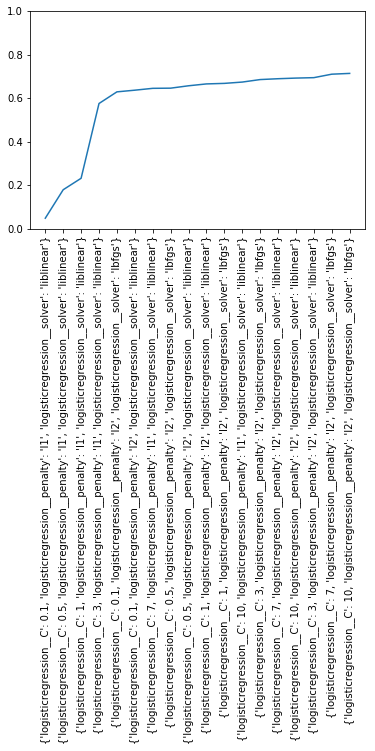

In [129]:
plot_df = logreg_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Logreg Results:

1. With increasing C-Value Scores improve. => Next run with C-Values in range 10-20
2. Solver lbfgs works best => remove other solver (liblinear)
3. Remove l1-reg

# MultinomialNB

nb_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

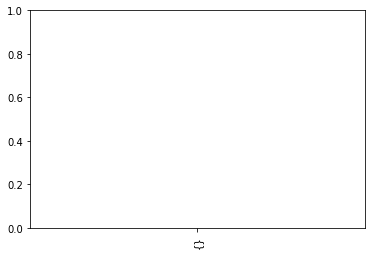

In [130]:
plot_df = nb_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

In [131]:
svm_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
6,"{'linearsvc__C': 3, 'linearsvc__penalty': 'l2'}",0.716905
8,"{'linearsvc__C': 7, 'linearsvc__penalty': 'l2'}",0.705317
10,"{'linearsvc__C': 10, 'linearsvc__penalty': 'l2'}",0.705317
4,"{'linearsvc__C': 1, 'linearsvc__penalty': 'l2'}",0.695794
2,"{'linearsvc__C': 0.5, 'linearsvc__penalty': 'l2'}",0.664921
0,"{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}",0.662857


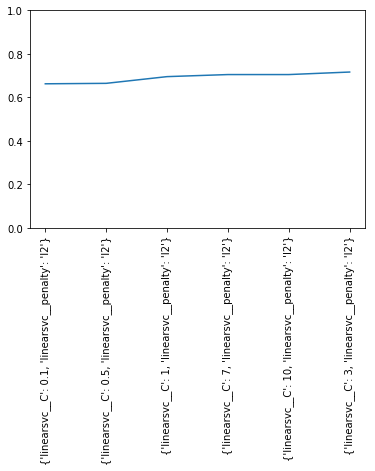

In [144]:
plot_df = svm_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### LinearSVC Results:

1. C Values 3,7 work best => Try with alues in that range
2. L1-Reg does not work => remove it

# Decision Tree

In [133]:
dectree_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
64,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 2}",0.404180
31,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.392275
69,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 5}",0.380084
24,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 2}",0.375000
43,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.372871
14,"{'decisiontreeclassifier__max_depth': 100, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.370298
65,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.369315
66,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 10}",0.362566
41,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.355847
44,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 2}",0.353102


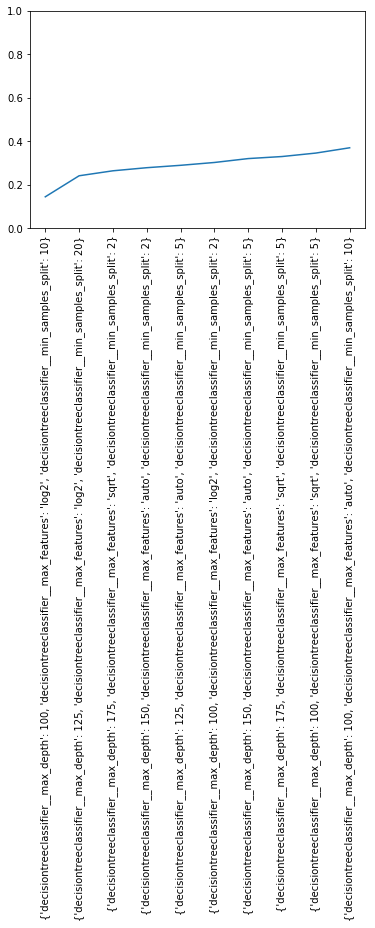

In [134]:
plot_df = dectree_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df)))[::6], plot_df.mean_test_score[::6])
plt.xticks(list(range(len(plot_df)))[::6], list(map(str, plot_df.params))[::6], rotation=90)
plt.ylim(0,1)
plt.show()

### DecTree Results:
1. Does not work will in general
2. Try min_samples split greateer than 10

# RandomForest

In [135]:
randomforest_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
3,{'randomforestclassifier__n_estimators': 1000},0.785635
2,{'randomforestclassifier__n_estimators': 400},0.767460
1,{'randomforestclassifier__n_estimators': 100},0.708333
0,{'randomforestclassifier__n_estimators': 5},0.320404


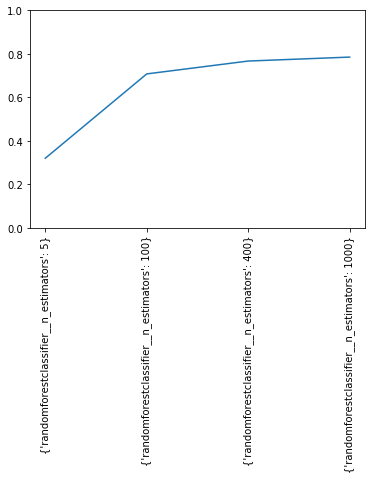

In [136]:
plot_df = randomforest_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Randomforest-Results:

1. Performance increases with number of estimators => Try with more than thousand estimators and values between 400, 1000

# 2. Run

## Params for Second Run

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words

pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {

    'logisticregression__C': list(range(10,21)),
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']
    
}

logreg = [pipe_logreg, pipe_logreg_params]

pipe_svm = make_pipeline(TfidfVectorizer(), LinearSVC())
pipe_svm_params = {
    'linearsvc__C': [3, 4, 5, 6, 7,],
    'linearsvc__penalty': ['l2']
    
}

svm = [pipe_svm, pipe_svm_params]

pipe_naivebayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb = [pipe_naivebayes, {'multinomialnb__alpha': [list(range(1,10))]}]

pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto"],
    'decisiontreeclassifier__max_depth': [None],
    'decisiontreeclassifier__min_samples_split': [10, 15, 20, 25, 30], 
}

dectree = [pipe_dectree, pipe_dectree_params]


pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [400, 500, 750, 1000, 1250, 1500, 1750, 2000],
}

randomforest = [pipe_randomforest, pipe_randomforest_params]


all_pipes_params = [logreg, svm, dectree, randomforest, nb]